In [1]:
# from google.colab import drive
# drive.mount("/content/drive")

# import os
# os.chdir('/content/drive/MyDrive/根據區域微氣候資料預測發電量競賽')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
# 讀取資料
df = pd.read_csv('L17_Train.csv')
df

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,17,2024-01-01 06:29:01.000,0,1022.91,17.9,63.1,22.50,0.00
1,17,2024-01-01 06:30:01.000,0,1023.01,17.9,63.1,29.17,0.00
2,17,2024-01-01 06:31:01.000,0,1023.06,17.9,63.2,35.00,0.01
3,17,2024-01-01 06:32:02.000,0,1022.97,17.9,63.4,38.33,0.00
4,17,2024-01-01 06:33:02.000,0,1022.95,17.9,63.3,42.50,0.01
...,...,...,...,...,...,...,...,...
96637,17,2024-07-12 15:26:46.000,0,1004.05,36.5,65.4,12315.00,35.91
96638,17,2024-07-12 15:27:47.000,0,1004.08,36.5,64.7,12692.50,38.23
96639,17,2024-07-12 15:28:47.000,0,1004.10,36.5,64.5,12960.00,39.95
96640,17,2024-07-12 15:29:47.000,0,1004.11,36.4,64.9,12751.67,38.51


In [4]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,96642.0,96642.0,96642.000000,96642.000000,96642.000000,96642.000000,96642.000000
mean,17.0,0.0,1015.856993,29.081946,69.144584,20873.141303,232.211642
std,0.0,0.0,6.383548,10.850124,22.033992,26643.458165,426.019452
min,17.0,0.0,999.340000,10.400000,25.400000,20.000000,0.000000
25%,17.0,0.0,1010.590000,20.400000,49.400000,2743.330000,1.990000
50%,17.0,0.0,1015.960000,26.500000,69.900000,8685.000000,18.210000
75%,17.0,0.0,1020.860000,36.000000,89.700000,27628.330000,189.117500
max,17.0,0.0,1030.710000,58.200000,99.900000,117758.200000,2626.480000


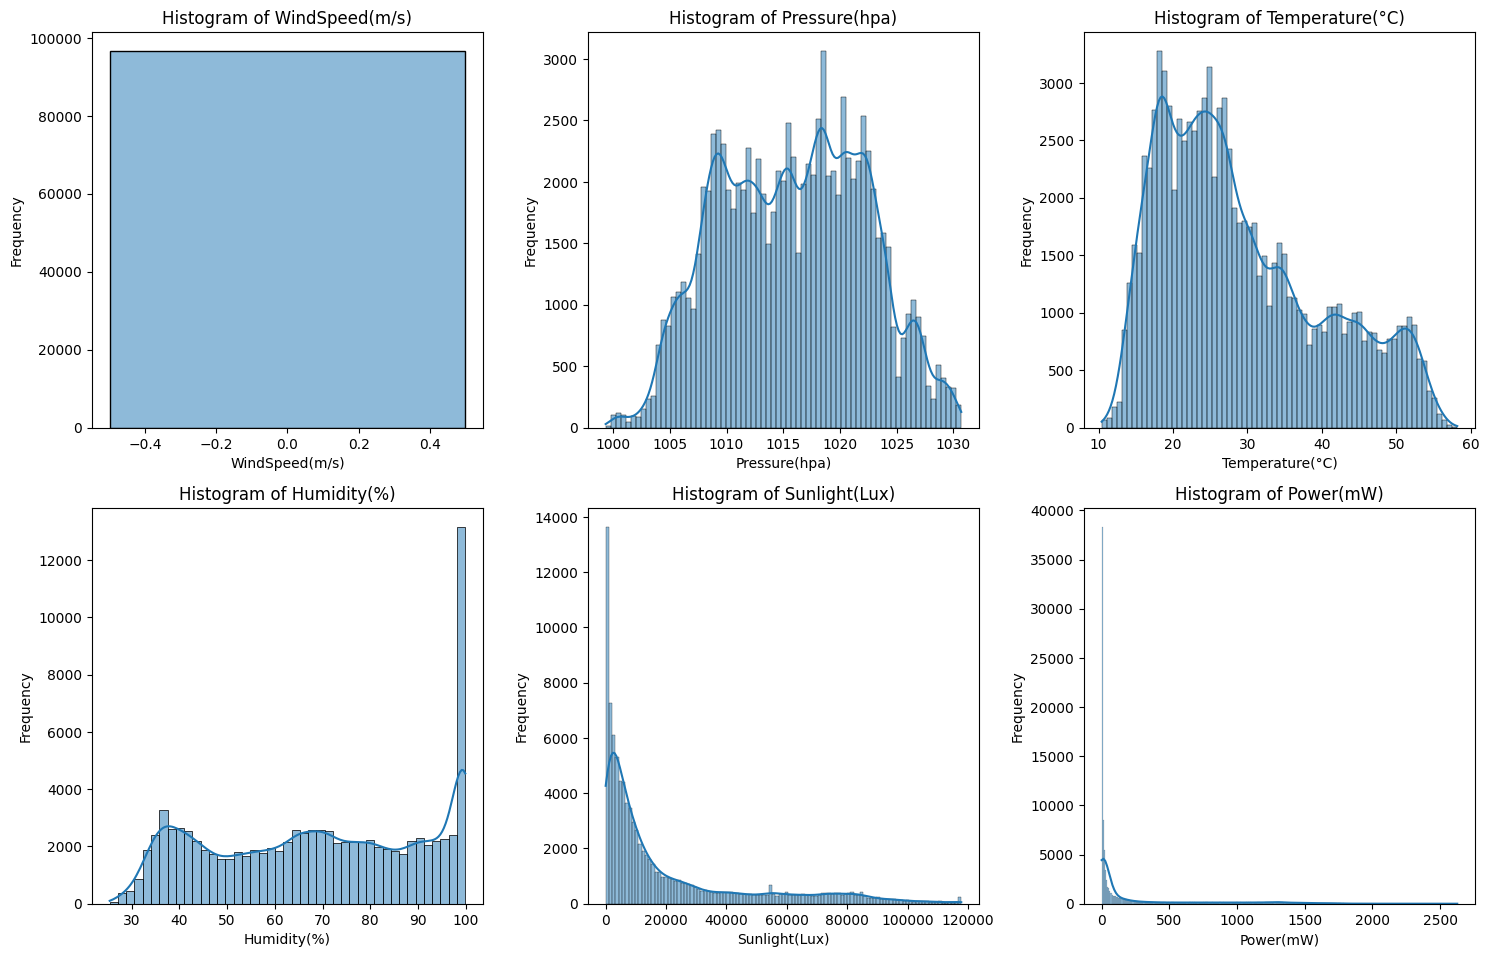

In [5]:
# 繪製直方圖
use_columns = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [6]:
# 篩選Sunlight(Lux)最大值
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] == max_sunlight]
df_filtered

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
12671,17,2024-01-20 09:24:03.000,0,1017.02,26.7,61.7,117758.2,836.68
12672,17,2024-01-20 09:25:03.000,0,1016.97,27.4,63.1,117758.2,2024.71
12673,17,2024-01-20 09:26:04.000,0,1016.98,28.3,62.6,117758.2,1677.06
12675,17,2024-01-20 09:28:04.000,0,1017.00,30.1,60.4,117758.2,1712.88
12680,17,2024-01-20 09:33:04.000,0,1016.96,34.0,53.5,117758.2,1673.89
...,...,...,...,...,...,...,...,...
58528,17,2024-04-07 10:48:23.000,0,1013.84,39.4,76.9,117758.2,1719.24
58531,17,2024-04-07 10:51:22.000,0,1013.77,42.1,72.4,117758.2,1584.19
58614,17,2024-04-07 12:14:23.000,0,1013.58,35.5,69.1,117758.2,1948.32
58622,17,2024-04-07 12:22:23.000,0,1013.34,41.4,58.2,117758.2,1759.97


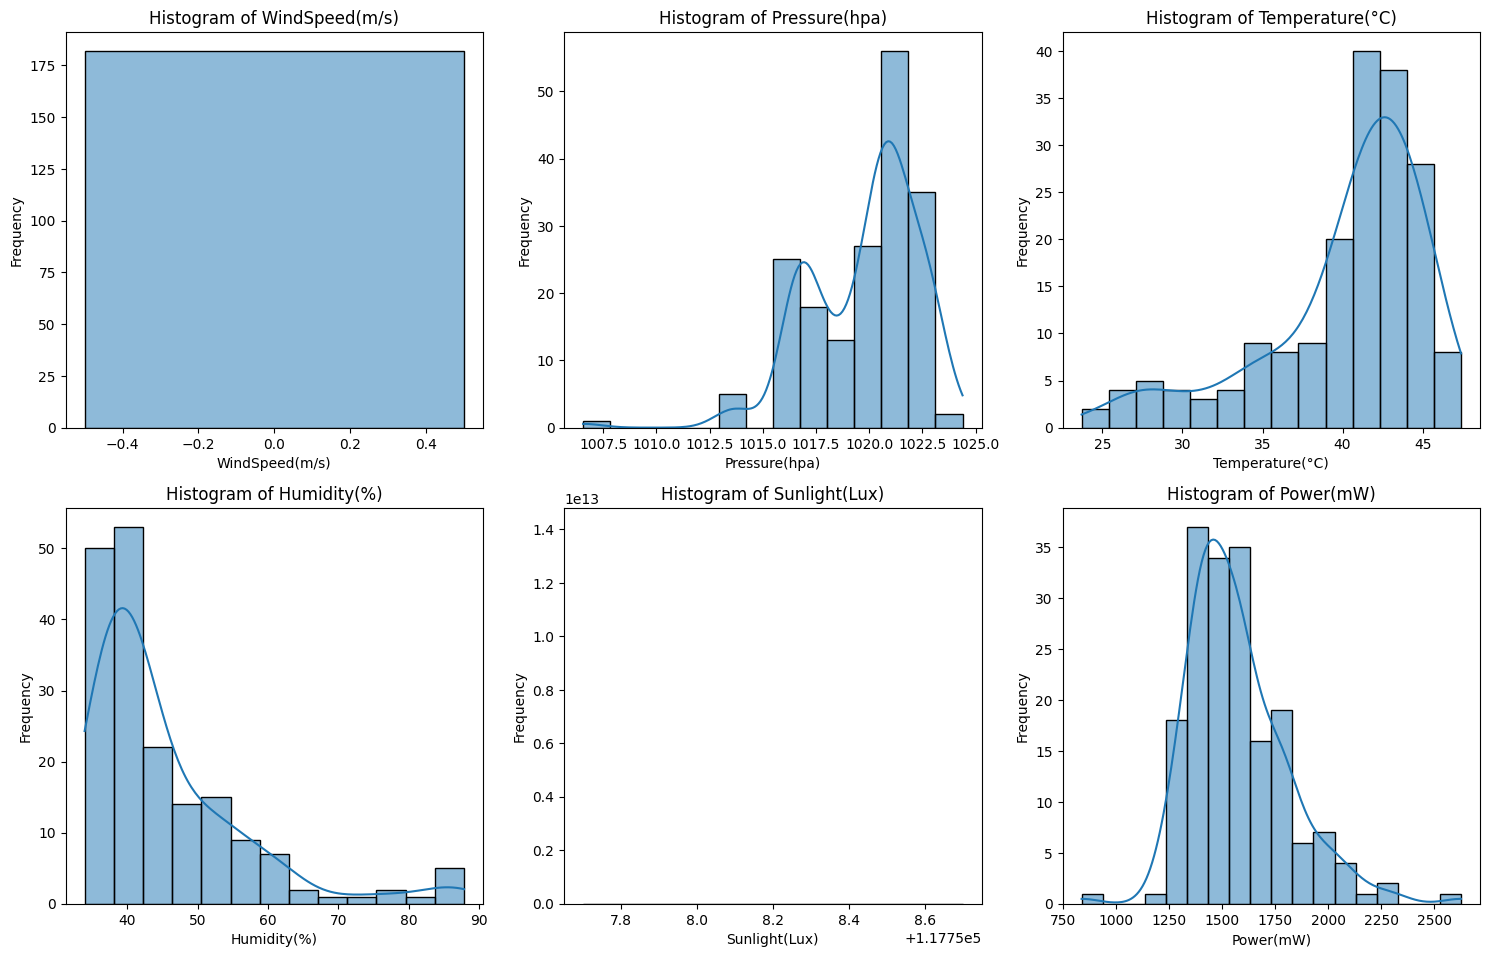

In [7]:
# 繪製直方圖
use_columns = df_filtered[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_filtered[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [8]:
# 利用迴歸分析先分析Sunlight(Lux)數值尚未達到最大值前的Sunlight(Lux)對Power(mW)的比率，回推Power(mW)所產生的Sunlight(Lux)
from sklearn.linear_model import LinearRegression

# 步驟 1：篩選資料（過濾 Sunlight(Lux) 未達到最大值的數據）
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] < max_sunlight]

# 步驟 2：設定自變數與因變數
X = df_filtered[['Sunlight(Lux)']]  # 自變數 (Sunlight)
y = df_filtered['Power(mW)']        # 因變數 (Power)

# 步驟 3：建立線性迴歸模型並進行訓練
model = LinearRegression()
model.fit(X, y)

# 顯示迴歸係數和截距
slope = model.coef_[0]
intercept = model.intercept_

print(f'回歸方程：Power(mW) = {slope:.4f} * Sunlight(Lux) + {intercept:.4f}')

回歸方程：Power(mW) = 0.0151 * Sunlight(Lux) + -82.7304


In [9]:
def calculate_sunlight(power):
    sunlight = (power - intercept) / slope
    return sunlight
slope = 0.0151
intercept = -82.7304

# 複製df_filtered
df_filtered = df[df['Sunlight(Lux)'] == df['Sunlight(Lux)'].max()].copy()

# 使用 .loc 指定修改列中的欄位，回推Sunlight(Lux)
df_filtered['Recalculated Sunlight(Lux)'] = df_filtered['Power(mW)'].apply(calculate_sunlight)

# 更新原始df中的Sunlight(Lux)欄位
df.loc[df_filtered.index, 'Sunlight(Lux)'] = df_filtered['Recalculated Sunlight(Lux)']
# df

In [10]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,96642.0,96642.0,96642.000000,96642.000000,96642.000000,96642.000000,96642.000000
mean,17.0,0.0,1015.856993,29.081946,69.144584,20857.881376,232.211642
std,0.0,0.0,6.383548,10.850124,22.033992,26598.793276,426.019452
min,17.0,0.0,999.340000,10.400000,25.400000,20.000000,0.000000
25%,17.0,0.0,1010.590000,20.400000,49.400000,2743.330000,1.990000
50%,17.0,0.0,1015.960000,26.500000,69.900000,8685.000000,18.210000
75%,17.0,0.0,1020.860000,36.000000,89.700000,27628.330000,189.117500
max,17.0,0.0,1030.710000,58.200000,99.900000,179417.907285,2626.480000


In [11]:
df['LocationCode'] = df['LocationCode'].apply(lambda x: f'{x:02d}')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# 提取日期時間的相關特徵
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second
df['Weekday'] = df['DateTime'].dt.weekday

df['DateTime'] = df['Year'].astype(str).str.zfill(4) + \
                    df['Month'].astype(str).str.zfill(2) + \
                    df['Day'].astype(str).str.zfill(2) + \
                    df['Hour'].astype(str).str.zfill(2) + \
                    df['Minute'].astype(str).str.zfill(2) + \
                    df['Second'].astype(str).str.zfill(2)
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second' ,'Weekday'], axis=1)
df['DateTime'] = df['DateTime'].astype('int64')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y%m%d%H%M%S')

# 每10筆資料合併成一筆並計算平均值
# 使用 `groupby` 和 `agg` 方法
df = df.groupby(df.index // 10).agg({
    'LocationCode': 'first',  # 取第一筆的 LocationCode
    'DateTime': 'first',  # 取第一筆的 DateTime
    'WindSpeed(m/s)': 'mean',
    'Pressure(hpa)': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Sunlight(Lux)': 'mean',
    'Power(mW)': 'mean',
}).reset_index(drop=True)

df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']] = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']].round(2)

# 將 DateTime 列轉換回原格式
df['DateTime'] = df['DateTime'].dt.strftime('%Y%m%d%H%M%S')

In [12]:
# 將 LocationCode 轉換為字符串
df['LocationCode'] = df['LocationCode'].astype(str)

# 修改 DateTime 的最後兩位數為 LocationCode 的值
df['DateTime'] = df['DateTime'].str.slice(0, -2) + df['LocationCode']

df = df.rename(columns={'DateTime': 'Serial'}) #　序號
df['Serial'] = df['Serial'].astype('int64')
df = df.drop(['LocationCode'], axis=1)
df

,Serial,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,20240101062917,0.0,1022.98,17.90,63.30,46.33,0.01
1,20240101063917,0.0,1023.09,17.90,63.64,162.17,0.02
2,20240101064917,0.0,1023.18,17.95,64.12,336.42,0.05
3,20240101065917,0.0,1023.20,18.02,65.11,725.00,0.17
4,20240101070917,0.0,1023.28,18.10,65.45,845.75,0.22
...,...,...,...,...,...,...,...
9660,20240712144917,0.0,1004.01,36.53,64.84,11602.00,30.25
9661,20240712145917,0.0,1003.97,36.40,62.99,10885.08,26.46
9662,20240712150917,0.0,1004.07,36.08,65.69,13286.75,41.97
9663,20240712151917,0.0,1004.07,36.38,65.29,12502.58,36.51


# HEATMAP

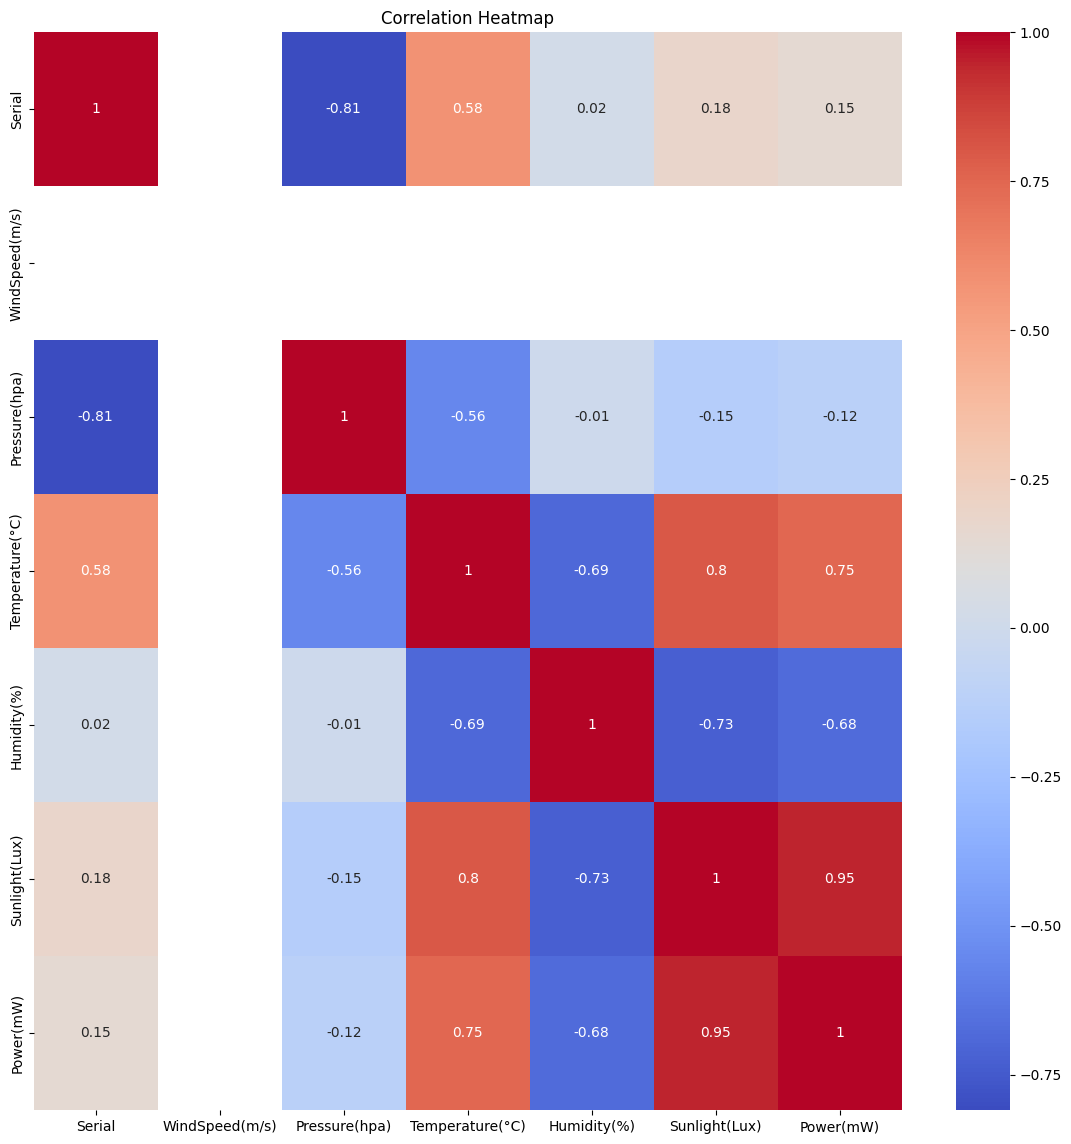

In [13]:
# 繪製熱力圖
plt.figure(figsize=(14, 14))

corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# 相關性絕對值
correlation = df.corr().abs()
top_10_features = correlation['Power(mW)'].sort_values(ascending=False).head(11)
top_10_features

Power(mW)          1.000000
Sunlight(Lux)      0.952055
Temperature(°C)    0.748990
Humidity(%)        0.678033
Serial             0.153460
Pressure(hpa)      0.117549
WindSpeed(m/s)          NaN
Name: Power(mW), dtype: float64

In [15]:
df.to_csv('L17_Train_Revise.csv', index=False)